# Baseball Case Study

# LinearRegression Model

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

C:\Users\Dipesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## Meanings of Each Terms

* Batting statistics

    1] 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
    
    2] 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    
    3] AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
    
    4] R – Runs scored: number of times a player crosses home plate
    
    5] H – Hit: reaching base because of a batted, fair ball without error by the defense
    
    6] BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
    
    7] HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error


* Pitching statistics

    1] W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
    
    2] SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
    
    3] SO – Strikeout: number of batters who received strike three
    
    4] RA – Run average: number of runs allowed times nine divided by innings pitched
    
    5] ER – Earned run: number of runs that did not occur as a result of errors or passed balls
    
    6] ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
    
    7] CG – Complete game: number of games where player was the only pitcher for their team
    
    8] SHO – Shutout: number of complete games pitched with no runs allowed
    

* Fielding statistics
    
    1] E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result
    

* Baserunning statistics

    1] SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

## Pre Processing

In [4]:
# checking columns avaialbe in the dataset
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
# checking shape of the dataset
df.shape

(30, 17)

In [6]:
# checking null values present in the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [18]:
# checking datatypes after replacing
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [19]:
# checking all null values and datatypes after transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [26]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


In [20]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Observations
* There are no nulls values
* the dataset consist of 30 rows and 17 columns
* the data is skewed in SB,CG,SHO,SV,E
* the standard deviation is more in some columns 
* no duplicate are present in the dataset

## EDA and Visualization

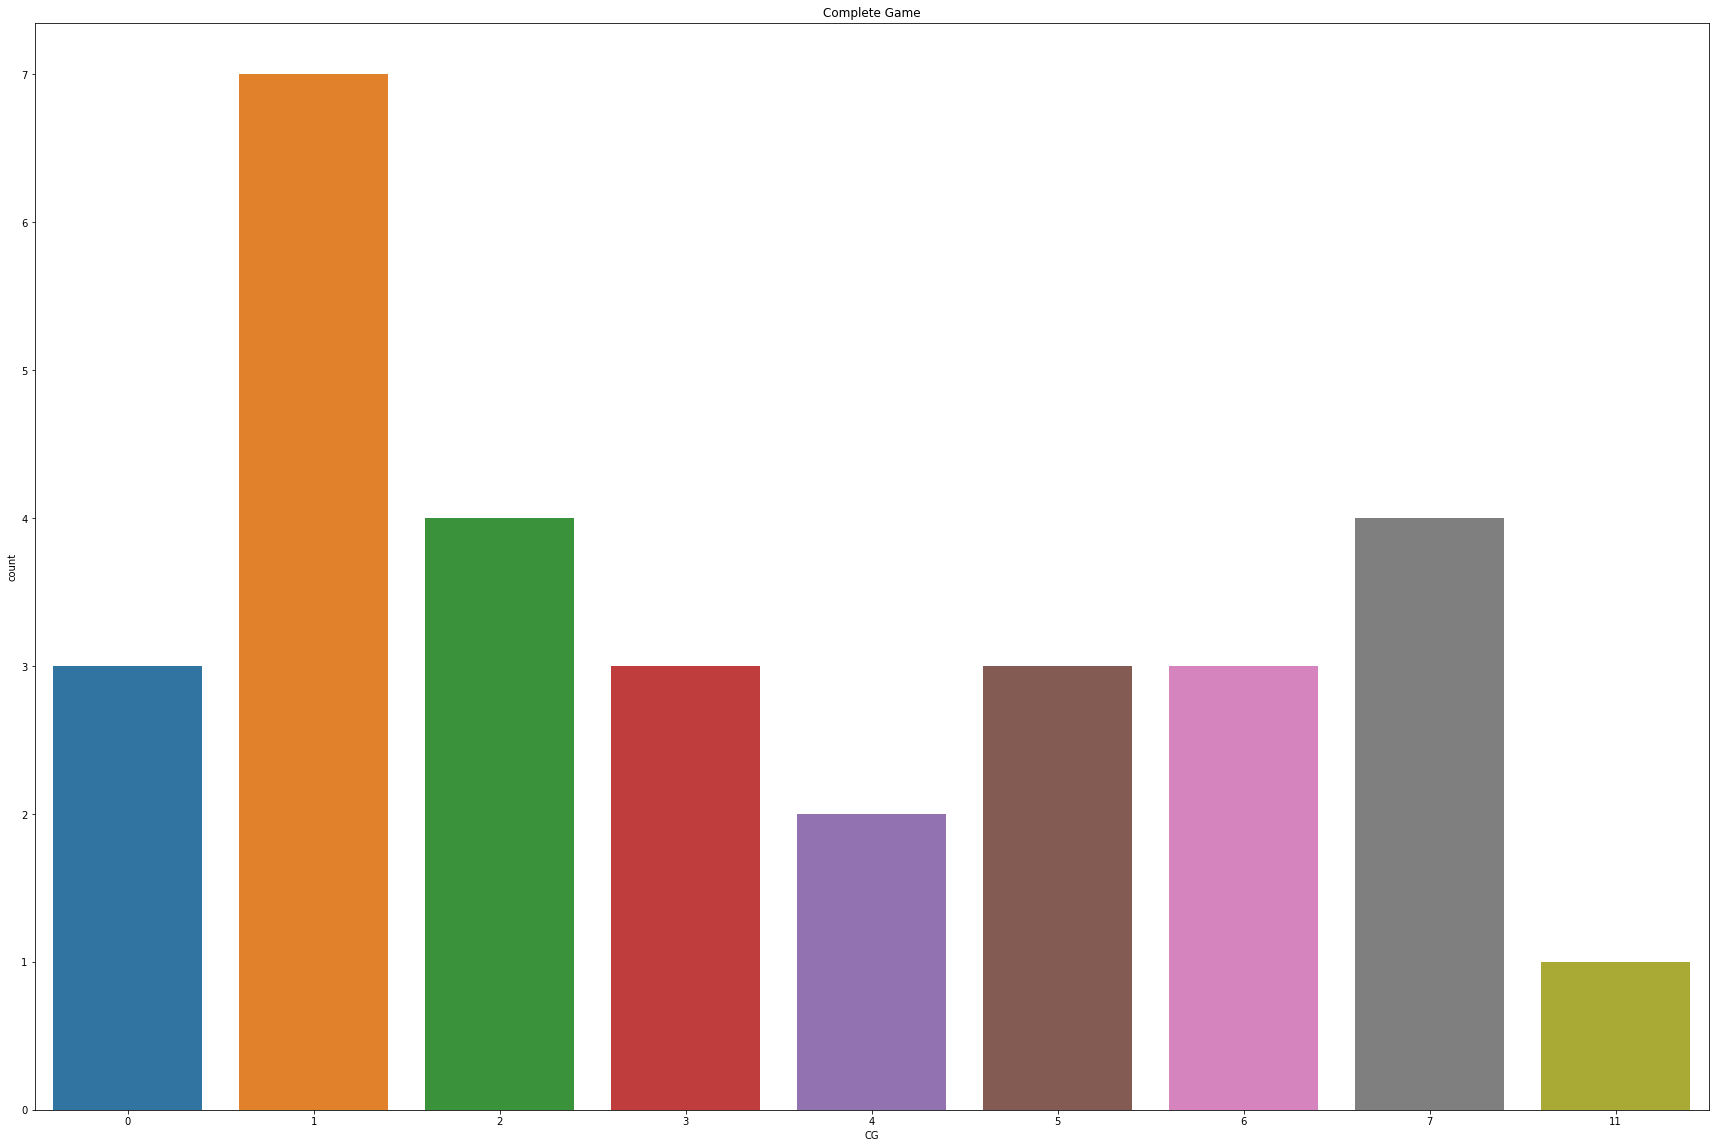

In [7]:
plt.figure(figsize=(30,20))
sns.countplot(x='CG' , data=df)
plt.title('Complete Game')
plt.show()

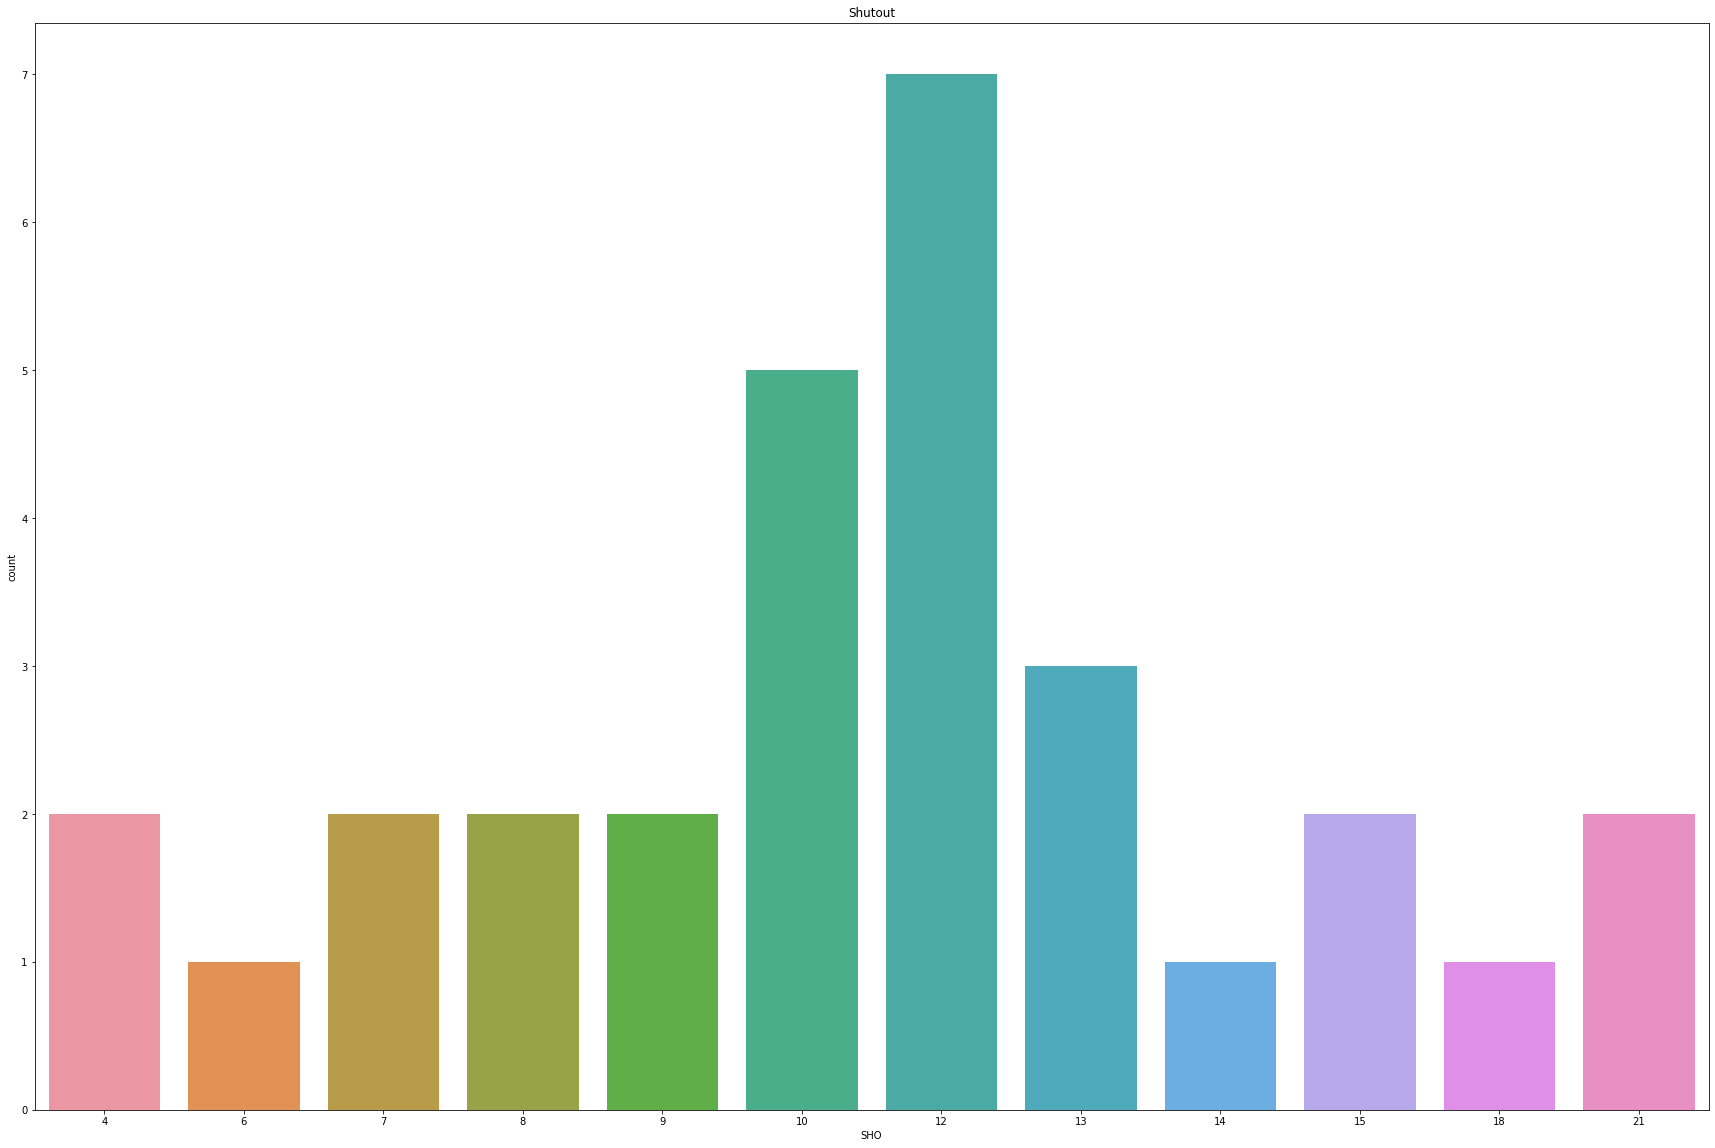

In [17]:
# Seeing which car sold most
plt.figure(figsize=(30,20))
sns.countplot(x='SHO' , data=df)
plt.title('Shutout')
plt.show()

## Plotting Heatmap to see co-relation 

In [21]:
corr=df.corr()
corr.shape

(17, 17)

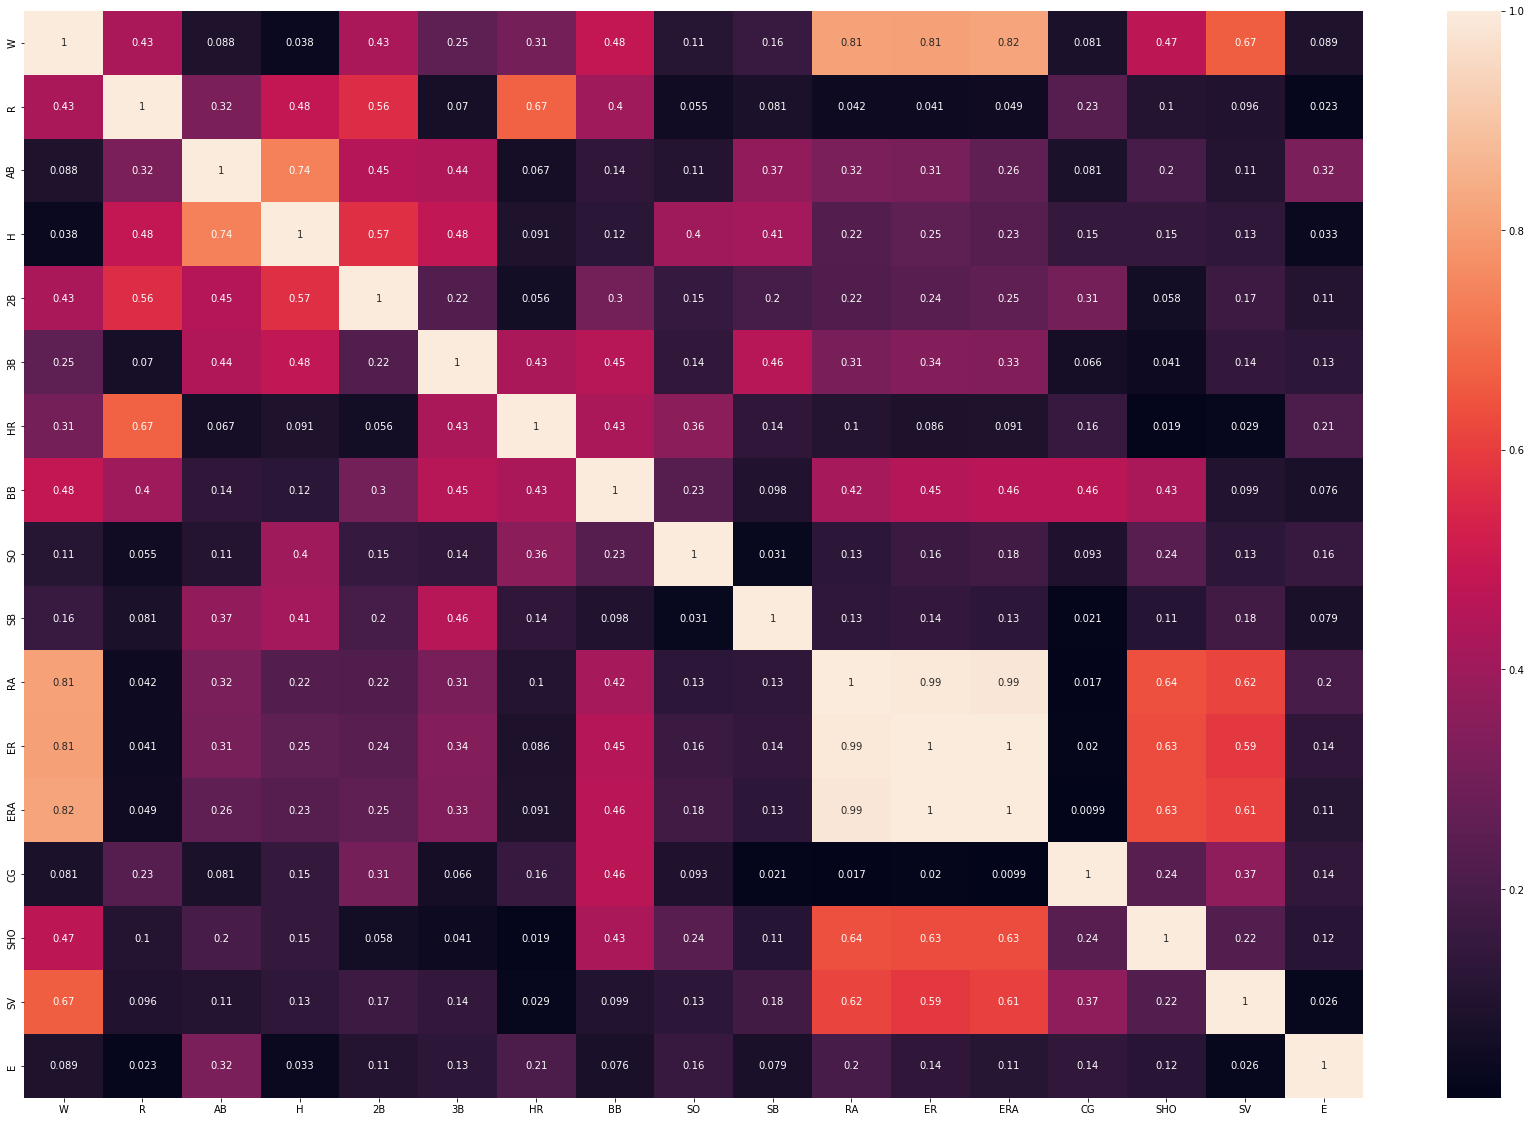

In [22]:
corr=df.corr().abs()
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True)
plt.show()

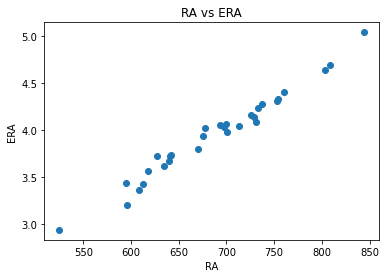

In [23]:
plt.scatter(df['RA'],df['ERA'])
plt.xlabel('RA')
plt.ylabel('ERA')
plt.title('RA vs ERA')
plt.show()

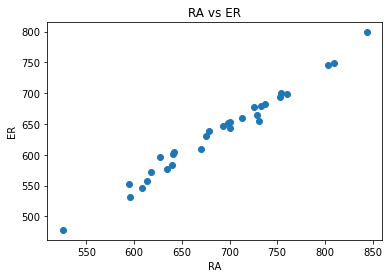

In [24]:
plt.scatter(df['RA'],df['ER'])
plt.xlabel('RA')
plt.ylabel('ER')
plt.title('RA vs ER')
plt.show()

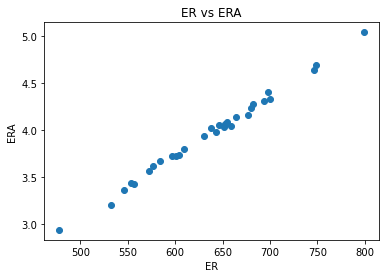

In [25]:
plt.scatter(df['ER'],df['ERA'])
plt.xlabel('ER')
plt.ylabel('ERA')
plt.title('ER vs ERA')
plt.show()

## From the heat map, we can observe that the ER, ERA, and RA are highly co-related to our label but in the feature vs feature same ER, ERA, and RA is highly co-related to each other.  H and AB are also highly co-related at 74% but I am assuming 75% is the max so it is ok.

### Plotting Histogram plot to see how data is distributed on an interval scale.

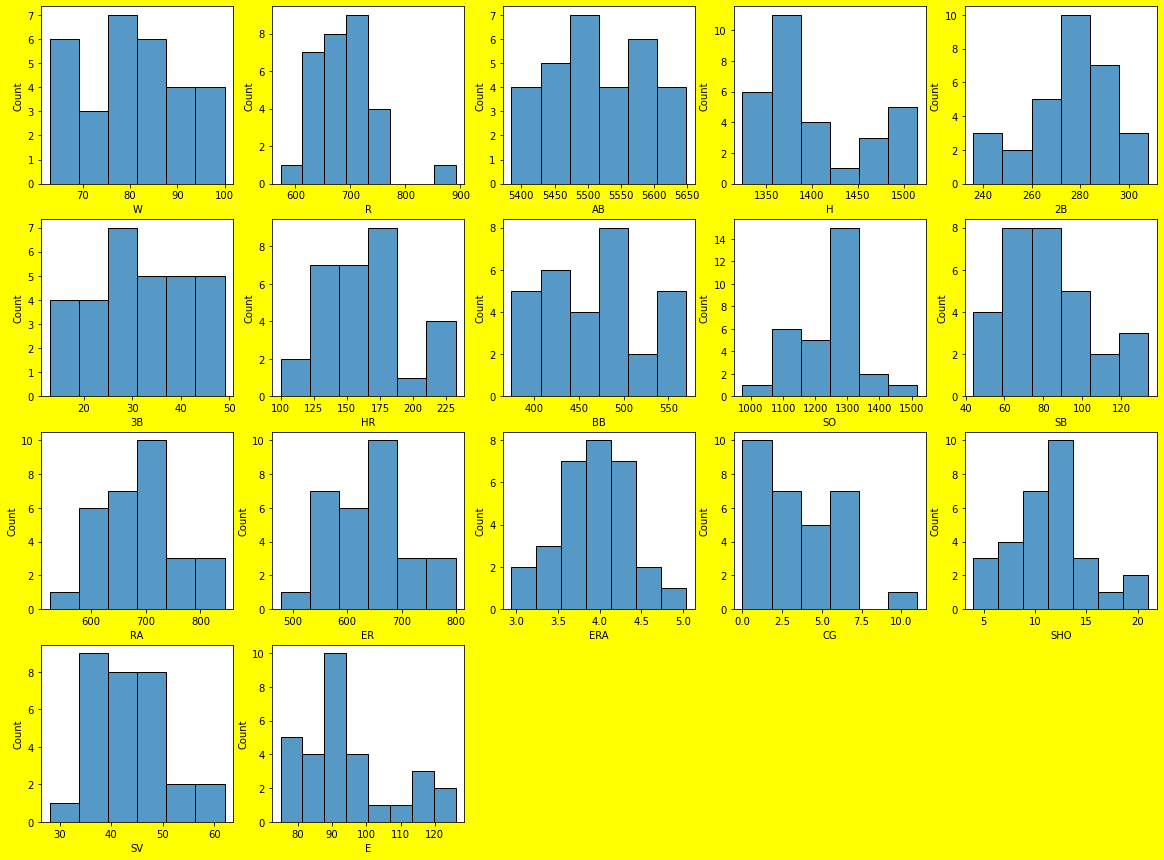

In [27]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the graph all the data I observe is ok there is a small amount of skewness but we will see it in the box plot.

### Plotting Disrtibution plot to see how data is distributed

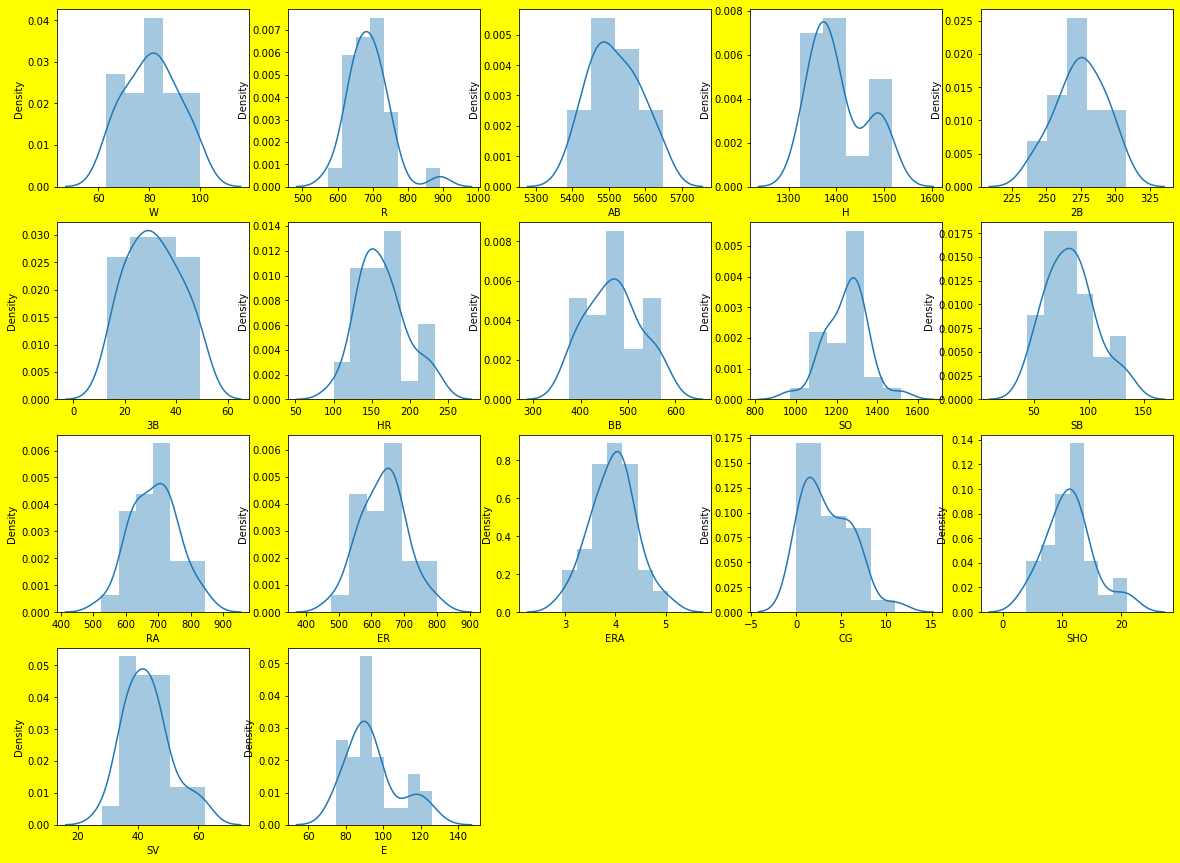

In [28]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the graph all the data I observe is ok there is a small amount of skewness but we will see it in the box plot.

### Splitting the dataset

In [29]:
X = df.drop(['W'],axis = 1)
y = df['W']

### Plotting Scatter plot to see realtion between feature and label

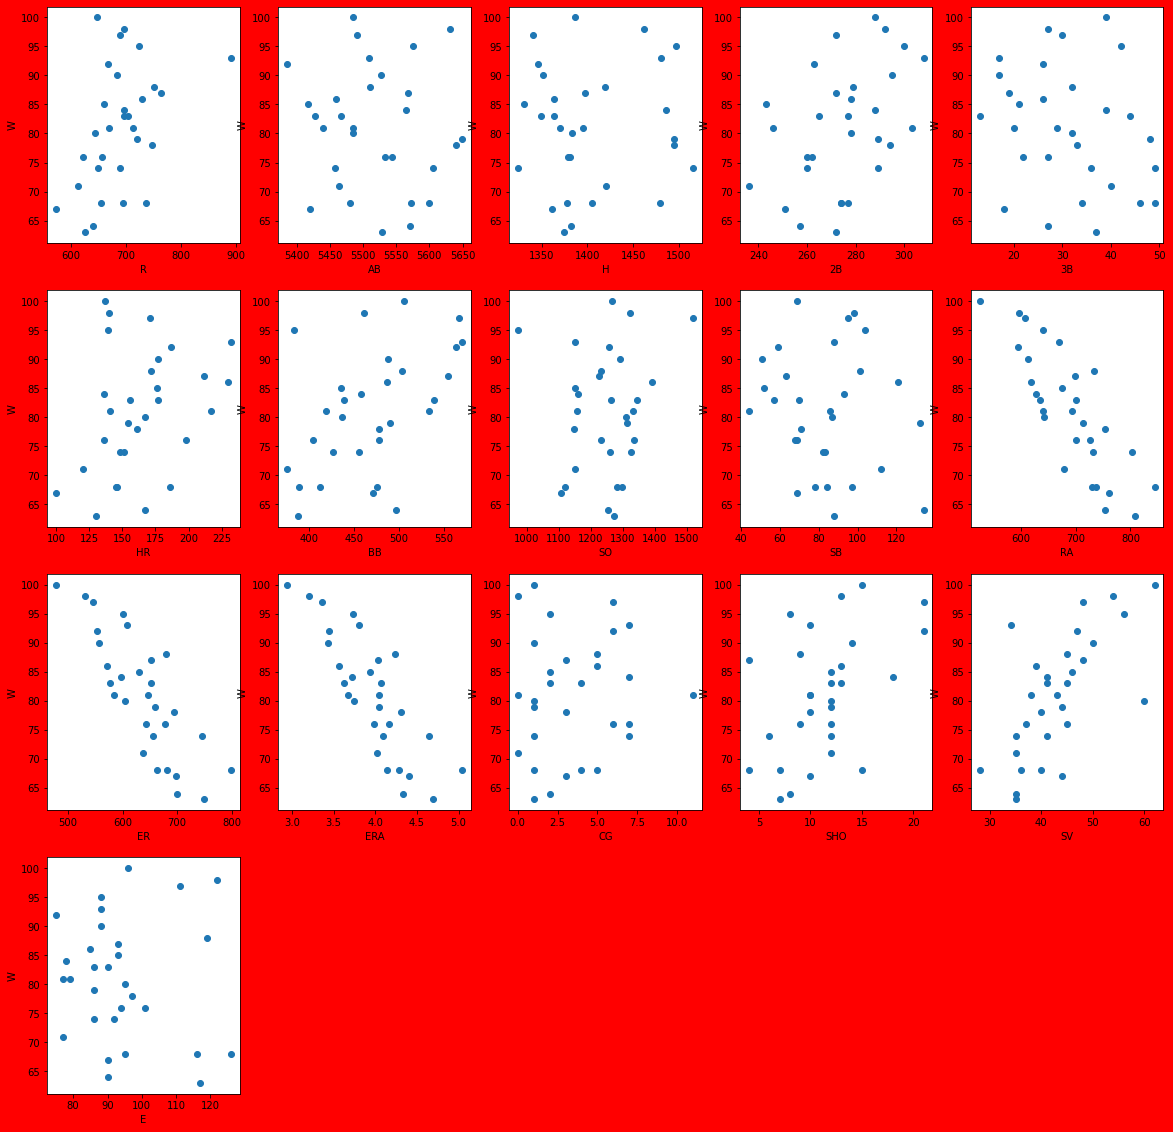

In [30]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,20) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## From the graphs, some features are highly negatively co-related some are positively co-related and some feature is not having any relation ship to the label.

### Plotting Regression plot to see realtion between feature and label

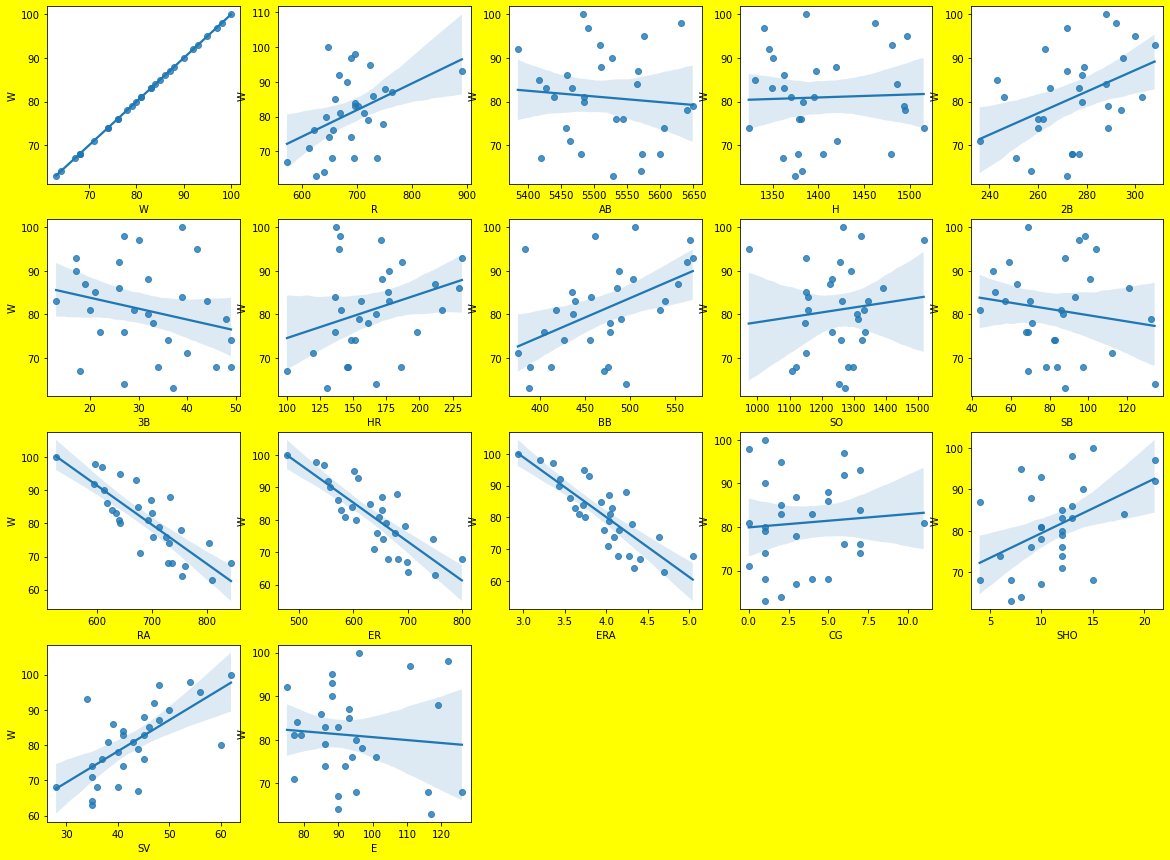

In [31]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.regplot (df[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the regression plot we can clearly observe R,2B,HR,BB,SO,SHO,SV are positively co-related, AB,3B,SB,RA,ER,ERA are negatively co-related.

### Plotting Box plot to see outliers are present are not

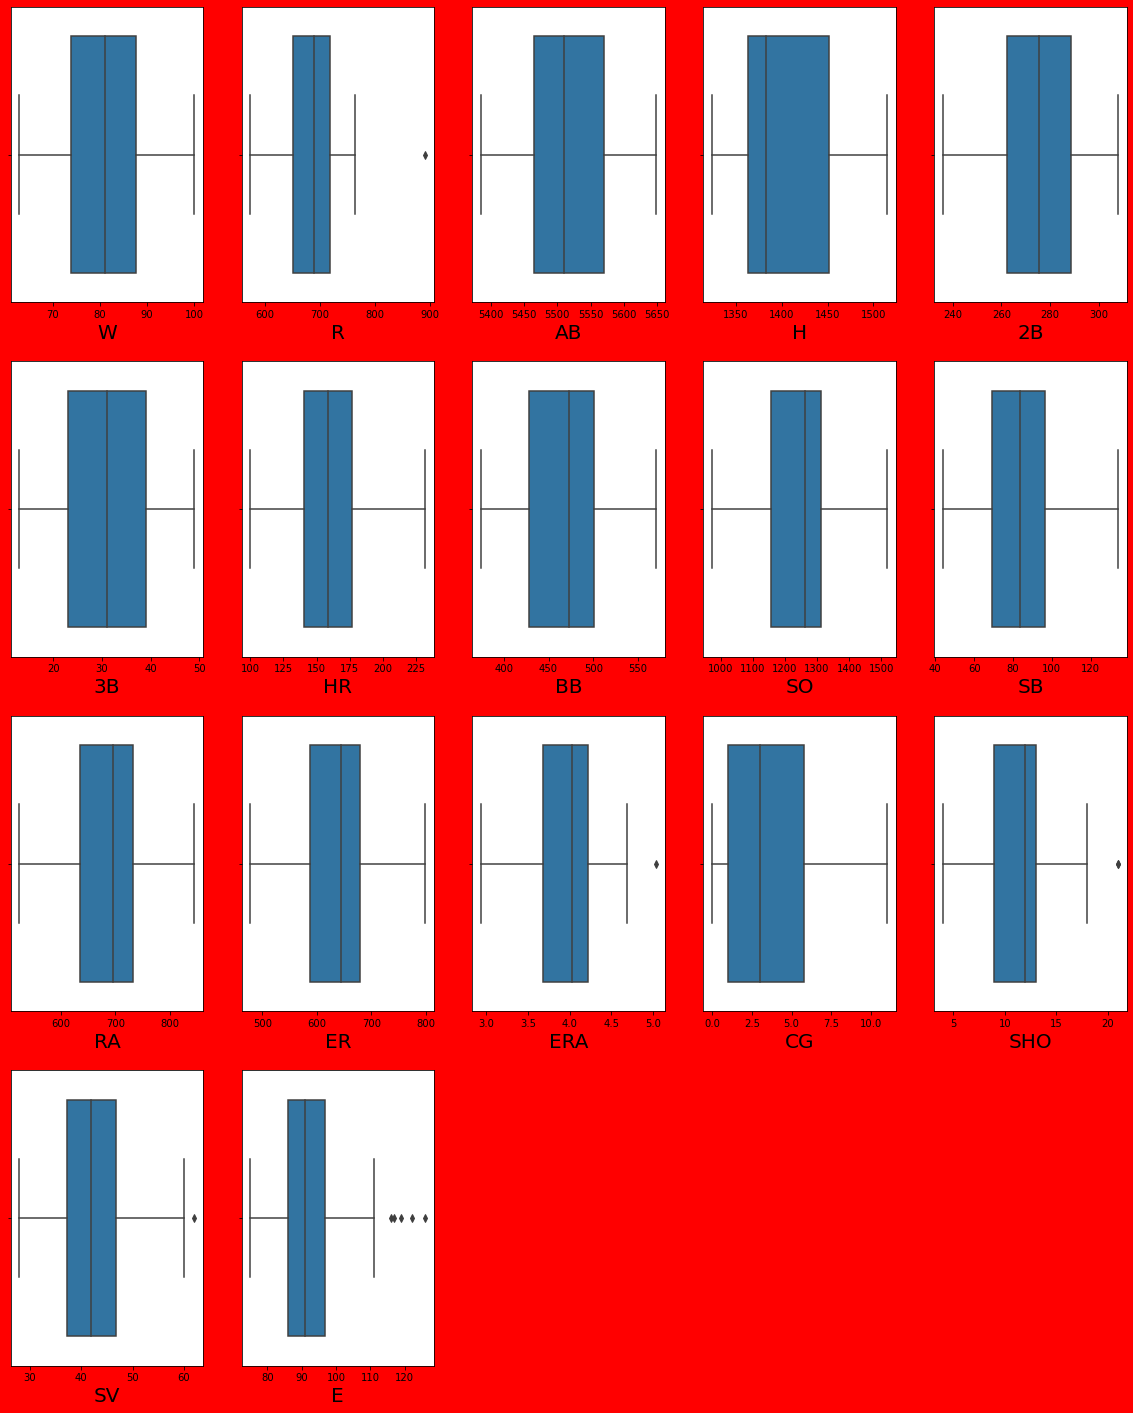

In [32]:
plt.figure(figsize=(20,25) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 20:
        plt.subplot (4,5,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## So in box plot only R,SHO,SV,E are only feature having outlier 

## Treating the outlier by Zscore method

In [33]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [34]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.8 ).all(axis=1)

df1 = df[filtering_entry]

df1.describe()



,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### checking the dataloss after tresting the outliers

In [35]:
print('percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.03333333333333333


### Checking for the multicollinearity Using VIF

In [38]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


In [39]:
# dropping RA , ER , ERA due to high VIF
X = df.drop(['RA','ER','ERA'],axis = 1)

In [40]:
# finding correlation between feature n lable using CORR method
#  (code type      --   feature corrwith label)

df.drop('W' , axis =1 ).corrwith (df.W)

R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
dtype: float64

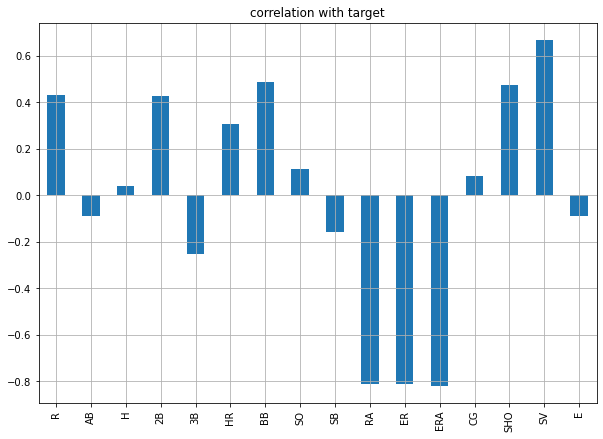

In [41]:
# convert above numbers into graph for better understanding
df.drop('W' , axis = 1).corrwith (df.W).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

## The above graphs show the relation with the target variable R,2B,HR,BB,SHO,SV are highly positively co-related and RA,ER,ERA are highly negatively co-related and which we dropped due to high VIF

## Feature selection by SELECT PERCENTILE FEATURE

In [42]:
### 2ND FEATURE SELECTION TECHNIQUE (SELECT PERCENTILE FEATURE , CHI2)
from sklearn.feature_selection import SelectPercentile , chi2

In [43]:
Spercentile = SelectPercentile(score_func = chi2 , percentile = 70)
sp = Spercentile.fit(X,y) 

In [44]:
X.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO',
       'SV', 'E'],
      dtype='object')

In [45]:
# instantiate selectpercentile an fit (feature and label)
X = df.drop(['W'] , axis=1)
y = df['W']

In [46]:
# seperate the feature to check the p value
cols = Spercentile.get_support(indices = True)  # this will give you index of 80% feature
print ('feature index'  , cols)

feature = X.columns[cols]                       # this will give you name of that 80% feature
print('feature' , list(feature))

feature index [ 0  1  3  5  6  7  8  9 12 13]
feature ['R', 'AB', '2B', 'HR', 'BB', 'SO', 'SB', 'RA', 'CG', 'SHO']


### Scaling the dataset

In [47]:
#scale our data using standard sclar

scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

### Finding the best Random satate

In [48]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 97.00301891668136 RandomState 0
Testing Score 48.2977251744928 RandomState 0


MAXINING TESTING SCORE 48.2977251744928 ON RANDOM STATE OF 0
Training Score 97.82124087918426 RandomState 1
Testing Score 7.485842374932283 RandomState 1


Training Score 99.40887480794474 RandomState 2
Testing Score -200.23894077647486 RandomState 2


Training Score 97.33967715951115 RandomState 3
Testing Score 56.56965305325634 RandomState 3


MAXINING TESTING SCORE 56.56965305325634 ON RANDOM STATE OF 3
Training Score 96.45375082973176 RandomState 4
Testing Score 60.2005403113406 RandomState 4


MAXINING TESTING SCORE 60.2005403113406 ON RANDOM STATE OF 4
Training Score 95.25192380276359 RandomState 5
Testing Score 74.1572120949312 RandomState 5


MAXINING TESTING SCORE 74.1572120949312 ON RANDOM STATE OF 5
Training Score 95.60336847885578 RandomState 6
Testing Score 71.71488150121516 RandomState 6


Training Score 96.53199973317554 RandomState 7
Testing Score 42.66108889812015 RandomState 

### Training the model

In [49]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=165)

In [50]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [51]:
#training score
regression.score(X_train,y_train)  

0.9463406728192237

In [52]:
#testing score
regression.score(X_test,y_test) 

0.8952394441101397

## ##  Model Score
* Training Score = 94.63406728192237 %
* Testing Score = 89.52394441101397 %

In [53]:
y_pred=regression.predict(X_test)
y_pred

array([57.74651566, 79.91144748, 84.93753405, 64.76171212, 96.34007344,
       67.3043239 , 80.07611159, 86.42343912])

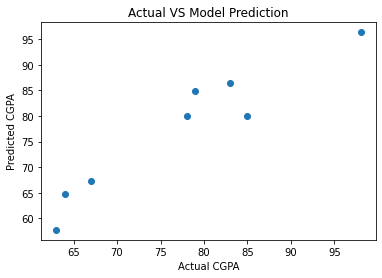

In [54]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual VS Model Prediction')
plt.show()

## Checking MAE , MSE & RMSE scores

In [55]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [56]:
# again predict 
y_pred = regression.predict(X_test)

In [57]:
#MAE
mean_absolute_error(y_test,y_pred)

3.0219694990529975

In [58]:
#MSE
mean_squared_error(y_test,y_pred)

13.23747836689532

In [59]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

3.638334559505945

## ## Scores
* MAE SCORE = 3.0219694990529975
* MSE SCORE = 13.23747836689532
* RMSE SCORE = 3.638334559505945

# LASSO MODEL

In [60]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [61]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100, normalize = True)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100, normalize=True)

In [62]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

0.11838328996599554

In [63]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.11838328996599554)

In [64]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.889216855498831

# RIDGE MODEL

In [68]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [66]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [67]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [69]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.8915349873920024

## SCORES
* LASSO SCORES = 88.9216855498831 %
* RIDGE SCORES = 89.15349873920024 %

In [70]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -1.0579322058345662 and the R2 score for Training is 0.9463406728192237 and R2 score for the Testing is0.8952394441101397


At cross fold 3 the cv score is 0.22588460167739685 and the R2 score for Training is 0.9463406728192237 and R2 score for the Testing is0.8952394441101397


At cross fold 4 the cv score is 0.24952166654368005 and the R2 score for Training is 0.9463406728192237 and R2 score for the Testing is0.8952394441101397


At cross fold 5 the cv score is 0.04075540667465653 and the R2 score for Training is 0.9463406728192237 and R2 score for the Testing is0.8952394441101397


At cross fold 6 the cv score is 0.25153530937202107 and the R2 score for Training is 0.9463406728192237 and R2 score for the Testing is0.8952394441101397


At cross fold 7 the cv score is 0.38908046442899324 and the R2 score for Training is 0.9463406728192237 and R2 score for the Testing is0.8952394441101397


At cross fold 8 the cv score is 0.31937022109669266 and the R2 s

## Cross-Validation Score
* Training Score = 94.63406728192237 %
* Testing Score = 89.52394441101397 %

# AdaBoostRegressor Model

In [72]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [73]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    pred=ada.predict(X_train)
    training=ada.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=ada.predict(X_test)
    testing=ada.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 98.54044191382727 RandomState 0
Testing Score 13.970196339930197 RandomState 0


MAXINING TESTING SCORE 13.970196339930197 ON RANDOM STATE OF 0
Training Score 98.55289848949678 RandomState 1
Testing Score 56.235891974486904 RandomState 1


MAXINING TESTING SCORE 56.235891974486904 ON RANDOM STATE OF 1
Training Score 98.48694973921106 RandomState 2
Testing Score 28.52294415401212 RandomState 2


Training Score 99.11978758742922 RandomState 3
Testing Score 56.36206031273072 RandomState 3


MAXINING TESTING SCORE 56.36206031273072 ON RANDOM STATE OF 3
Training Score 98.4265390319849 RandomState 4
Testing Score -13.747864511465902 RandomState 4


Training Score 98.75461399623585 RandomState 5
Testing Score 38.4442842265481 RandomState 5


Training Score 98.39841853300625 RandomState 6
Testing Score 58.703016553149176 RandomState 6


MAXINING TESTING SCORE 58.703016553149176 ON RANDOM STATE OF 6
Training Score 98.96624259740729 RandomState 7
Testing Score 73.02060486698596 Ra

### Training the model

In [74]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=97)

In [75]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [76]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [77]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9935723944246575


In [78]:
# model prediction on testing datadet
pred = ada.predict(X_test)

In [79]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8091969913922218


## Model Scores
* Training Score = 99.35723944246575 %
* testing Score = 80.91969913922218 %

## Hyperparameter Tuning for Ada Boost

In [80]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [81]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [82]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [83]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [84]:
rnd_srch.best_params_

{'n_estimators': 55, 'learning_rate': 0.25}

In [85]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=55)

In [86]:
ada = AdaBoostRegressor(learning_rate=0.4, n_estimators=53)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

=== Testing Score ===
0.8169604503036586


## Model Score after Hyperparameter Tuning
* Testing Score = 81.69604503036586 %

## Cross Validation for Ada Boost

In [88]:
#Cross Vaildation
training=ada.score(X_train,y_train)
testing=ada.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ada,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -0.28366950270383495 and the R2 score for Training is 0.9922132975325526 and R2 score for the Testing is0.8169604503036586


At cross fold 3 the cv score is 0.5226686372374189 and the R2 score for Training is 0.9922132975325526 and R2 score for the Testing is0.8169604503036586


At cross fold 4 the cv score is 0.4308134288081914 and the R2 score for Training is 0.9922132975325526 and R2 score for the Testing is0.8169604503036586


At cross fold 5 the cv score is -1.2160082744898335 and the R2 score for Training is 0.9922132975325526 and R2 score for the Testing is0.8169604503036586


At cross fold 6 the cv score is 0.11608575821413157 and the R2 score for Training is 0.9922132975325526 and R2 score for the Testing is0.8169604503036586


At cross fold 7 the cv score is -0.06580148561168254 and the R2 score for Training is 0.9922132975325526 and R2 score for the Testing is0.8169604503036586


At cross fold 8 the cv score is -0.4640141806840305 and the R2 s

## Cross Validation score
* Training score = 99.22132975325526 %
* Testing Score = 81.69604503036586 %

# RandomForestRegressor Model

In [90]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [91]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 93.45661280446318 RandomState 0
Testing Score 38.686850459482095 RandomState 0


MAXINING TESTING SCORE 38.686850459482095 ON RANDOM STATE OF 0
Training Score 92.66415783719313 RandomState 1
Testing Score 62.09376063528078 RandomState 1


MAXINING TESTING SCORE 62.09376063528078 ON RANDOM STATE OF 1
Training Score 93.42536987522283 RandomState 2
Testing Score 23.845448842419703 RandomState 2


Training Score 94.33024736448908 RandomState 3
Testing Score 55.933420883223874 RandomState 3


Training Score 92.50319922552175 RandomState 4
Testing Score 4.110881135422817 RandomState 4


Training Score 91.60989921995105 RandomState 5
Testing Score 64.55630857966833 RandomState 5


MAXINING TESTING SCORE 64.55630857966833 ON RANDOM STATE OF 5
Training Score 93.52235170955382 RandomState 6
Testing Score 54.26101806239736 RandomState 6


Training Score 91.50374675008125 RandomState 7
Testing Score 62.75533234859674 RandomState 7


Training Score 90.6506982001565 RandomState 8
Test

### Training the model

In [93]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=163)

In [94]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
 # model prediction on training dataset
y_pred = rf.predict(X_train)

In [96]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9285126636058384


In [97]:
# model prediction on testing datadet
pred = rf.predict(X_test)

In [98]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9393885672585746


## Model Score
* Training Score = 92.85126636058384 %
* Testing Score = 93.93885672585746 %

## Hyperparameter tuning for Random Forest

In [99]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [100]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [101]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [102]:
#print best parameters
print(clf.best_params_)

{'criterion': 'mae', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 11}


In [107]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'mae', max_depth= 15, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 11)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=15, max_features='auto',
                      min_samples_split=11)

In [108]:
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  74.44711608305352


In [109]:
pred_decision=rf.predict(X_test)
rfs = r2_score(y_test,pred_decision)

In [110]:
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 83.64507905619068


## Model Score after Hyperparameter Tuning
* Training Score = 74.44711608305352 %
* Testing Score = 83.64507905619068 %

## Cross Validation for Random Forest

In [114]:
#Cross Vaildation
training=rf.score(X_train,y_train)
testing=rf.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -0.0486699277568482 and the R2 score for Training is 0.7444711608305352 and R2 score for the Testing is0.8364507905619069


At cross fold 3 the cv score is 0.27607946197976935 and the R2 score for Training is 0.7444711608305352 and R2 score for the Testing is0.8364507905619069


At cross fold 4 the cv score is 0.2399793199777846 and the R2 score for Training is 0.7444711608305352 and R2 score for the Testing is0.8364507905619069


At cross fold 5 the cv score is -0.7400506010051446 and the R2 score for Training is 0.7444711608305352 and R2 score for the Testing is0.8364507905619069


At cross fold 6 the cv score is 0.2389510077064967 and the R2 score for Training is 0.7444711608305352 and R2 score for the Testing is0.8364507905619069


At cross fold 7 the cv score is -0.03403063191019492 and the R2 score for Training is 0.7444711608305352 and R2 score for the Testing is0.8364507905619069


At cross fold 8 the cv score is -0.20611383726717786 and the R2 s

##  Cross Validation score
* Training score = 74.44711608305352 %
* Testing Score = 83.64507905619069 %

# GradientBoostingRegressor Model

In [167]:
# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


## Finding the best Random Forest

In [168]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 99.99999715098554 RandomState 0
Testing Score 8.413690009529196 RandomState 0


MAXINING TESTING SCORE 8.413690009529196 ON RANDOM STATE OF 0
Training Score 99.99999058229064 RandomState 1
Testing Score 55.18014233256938 RandomState 1


MAXINING TESTING SCORE 55.18014233256938 ON RANDOM STATE OF 1
Training Score 99.99998638669248 RandomState 2
Testing Score 41.273917619217 RandomState 2


Training Score 99.99999904322877 RandomState 3
Testing Score 57.644029395928854 RandomState 3


MAXINING TESTING SCORE 57.644029395928854 ON RANDOM STATE OF 3
Training Score 99.99999784031688 RandomState 4
Testing Score -14.24569937242488 RandomState 4


Training Score 99.9999945106266 RandomState 5
Testing Score 63.603757921820716 RandomState 5


MAXINING TESTING SCORE 63.603757921820716 ON RANDOM STATE OF 5
Training Score 99.99997645867482 RandomState 6
Testing Score 50.55004684437099 RandomState 6


Training Score 99.9999934193367 RandomState 7
Testing Score 66.83087348247375 RandomS

In [169]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

MAXINING TESTING SCORE 73.57968169470487 ON RANDOM STATE OF 199


### Training the model

In [171]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [172]:
# initiate GradientBoostingClassifier
gbdt= GradientBoostingRegressor()
gbdt.fit(X_train , y_train)

GradientBoostingRegressor()

In [173]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)

In [174]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9999999009626777


In [175]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)

In [176]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6812579234703062


## Model Score
* Training Score = 99.99999009626777 %
* Testing Score = 68.12579234703062 %

## Hyperparameter tuning for GradientBoostingRegressor

In [177]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [178]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}

In [179]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [180]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [181]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'min_samples_split': 11,
 'n_estimators': 90}

In [183]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 1,
 min_samples_split= 11,
 n_estimators= 90)

In [184]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, min_samples_split=11, n_estimators=90)

In [187]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [188]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.978105085165625


In [189]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [190]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.7649877544552725


## Model Score after Hyperparameter Tuning
* Training Score = 97.8105085165625 %
* Testing Score = 76.49877544552725 %

#  All model score after hyperparameter tuning

** Linear Regression Model

    Training Score = 94.63406728192237 %
    
    Testing Score = 89.52394441101397 %


** AdaBoostRegressor Model

    Testing Score = 81.69604503036586 %


** RandomForestRegressor Model 

    Training Score = 74.44711608305352 %
    
    Testing Score = 83.64507905619068 %


** GradientBoostingRegressor Model

    Training Score = 97.8105085165625 %
    
    Testing Score = 76.49877544552725 %